# Доверительные интервалы для доли 

Большая часть млекопитающих неспособны во взрослом возрасте переваривать лактозу, содержащуюся в молоке. У людей за расщепление лактозы отвечает фермент лактаза, кодируемый геном LCT. У людей с вариантом 13910T этого гена лактаза продолжает функционировать на протяжении всей жизни. Распределение этого варианта гена сильно варьируется в различных генетических популяциях.

Из 50 исследованных представителей народа майя вариант 13910T был обнаружен у одного. Постройте нормальный 95% доверительный интервал для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [28]:
import numpy as np
import random
# генеруем 0 выборку заданного размера
data = np.zeros(50)
# присваиваем случайному элементу выборки позитивный ответ
data[random.randint(0, 50)] = 1
data

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Точечная оценка доли

In [29]:
data.mean()

0.02

## Доверительный интервал для доли

In [30]:
from statsmodels.stats.proportion import proportion_confint

### Доверительный интервал на основе нормального распределения

$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

In [31]:
normal_interval = proportion_confint(sum(data), len(data), method = 'normal')
display(sum(data)) #количество успехов
display(len(data)) #количество событий
#method = 'normal' метод оценки

1.0

50

In [33]:
print 'normal_interval [%.4f, %.4f] with width %.4f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0])
normal_interval

normal_interval [0.0000, 0.0588] with width 0.0588


(0.0, 0.05880530708179099)

В условиях предыдущей задачи постройте 95% доверительный интервал Уилсона для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

### Доверительный интервал Уилсона

$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{
z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [12]:
wilson_interval = proportion_confint(sum(data), len(data), method = 'wilson')

In [13]:
print 'wilson_interval [%f, %f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0])

wilson_interval [0.003539, 0.104954] with width 0.101415


Пусть в популяции майя действительно 2% носителей варианта 13910T, как в выборке, которую мы исследовали. Какой объём выборки нужен, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью ±0.01 на уровне доверия 95%?

## Размер выборки для интервала заданной ширины

In [15]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [16]:
n_samples = int(np.ceil(samplesize_confint_proportion(data.mean(), 0.01)))
n_samples

753

Постройте график зависимости объёма выборки, необходимого для оценки для доли носителей гена 13910T с точностью ±0.01 на уровне доверия 95%, от неизвестного параметра p. Посмотрите, при каком значении p нужно больше всего испытуемых. Как вы думаете, насколько вероятно, что выборка, которую мы анализируем, взята из случайной величины с этим значением параметра?

Как бы вы не ответили на последний вопрос, рассмотреть объём выборки, необходимый при таком p, всё равно полезно — это даёт максимально пессимистичную оценку необходимого объёма выборки.

Какой объём выборки нужен в худшем случае, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью ±0.01 на уровне доверия 95%?

In [17]:
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# формируем вектор для неизвестного параметра р
p = np.linspace(0, 1, 101)

In [22]:
# формируем вектор значений размера выборки исходя из значения параметра р
v = []
for i in range(101):
    n_samples = int(np.ceil(samplesize_confint_proportion(p[i], 0.01)))
    v.append(n_samples)

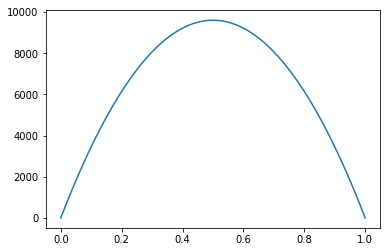

In [24]:
plt.plot(p, v);

In [34]:
# определяем максимальное значение выборки
max(v)

9604